In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import utils

In [2]:
df_labels = utils.create_df_from_files(path='data/clases/')
df_labels

1
['AL_08C\n', 'AL_13B\n', 'AL_14B\n', 'BA115_4\n', 'BA172_3\n', 'BA191_2\n', 'BA191_3\n', 'BA191_4\n', 'BA208_2\n', 'BA208_3\n', 'BA42_2\n', 'BA43_3\n', 'BA44_1\n', 'BA45_3\n', 'BA45_4\n', 'CCCATA_9_09\n', 'CCCATA_9_13\n', 'CCCATA_9_14\n', 'GI_anf01\n', 'LP17_1\n', 'MB_01\n', 'MB_03\n', 'TU110_1\n', 'TU110_2\n', 'TU110_3\n', 'TU110_4\n', 'TU13\n', 'TU8_1\n', 'TU8_2\n', 'TU96_2\n']
2
['BA113_1\n', 'BA121_1\n', 'BA135_1\n', 'BA168_1\n', 'BA178_1\n', 'BA178_2\n', 'BA181_1\n', 'BA188_1\n', 'BA206_5\n', 'BA21_1\n', 'BA24_1\n', 'BA36a_1\n', 'BA5_3\n', 'BA82_4\n', 'BO18_1\n', 'BO18_2\n', 'BO19_2\n', 'BO5_1\n', 'CC01_1\n', 'CC01_2\n', 'CC01_3\n', 'CC015_3\n', 'CC017_4\n', 'CC02_3\n', 'CC02_5\n', 'CC02_6\n', 'CC5_617_1\n', 'EL03_4\n', 'ER05\n', 'GU008\n', 'GU041\n', 'LP10_1\n', 'LP11_2\n', 'PO027\n', 'TO1_1\n', 'TO2_1\n', 'TO4_1\n', 'TO4_6\n', 'TO4_7\n', 'TU02\n', 'TU11_1\n', 'TU44_2\n', 'TU44_3\n', 'TU84_2\n', 'TU86_1\n', 'TU96_1\n', 'TU97_4\n']
3
['BA102_2\n', 'BA110_1\n', 'BA116_1\n', 'BA11

,id,class
0,AL_08C,1
1,AL_13B,1
2,AL_14B,1
3,BA115_4,1
4,BA172_3,1
5,BA191_2,1
6,BA191_3,1
7,BA191_4,1
8,BA208_2,1
9,BA208_3,1


In [3]:
df = pd.read_csv('data/input_morphoJ.csv')
df['id'] = df['id'].apply(lambda x: x.split('.')[0])
df

,id,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x95,y95,x96,y96,x97,y97,x98,y98,x99,y99
0,AL_03A,190.0,108.003137,184.513096,115.490041,176.440406,116.443544,169.003137,117.070194,164.880813,...,176.543941,74.540804,182.030845,82.027708,186.103535,90.100398,189.469118,98.465981,190.0,108.003137
1,AL_03B,178.0,117.003137,173.249070,124.754067,165.498141,129.504996,157.454318,126.457455,149.996282,...,161.003137,85.170751,166.581913,92.578776,172.747056,99.743919,177.003137,107.699821,178.0,117.003137
2,AL_03C,192.0,114.003137,185.058428,120.944709,175.508404,123.003137,165.953458,121.049679,158.304779,...,173.896840,79.893703,179.838412,87.835275,186.003137,95.684414,191.014450,104.011312,192.0,114.003137
3,AL_03D,177.0,85.003137,173.741431,92.261706,166.268656,95.003137,158.488771,95.003137,152.965724,...,161.850678,56.847541,167.230567,63.227430,172.610457,69.607320,176.576133,76.572995,177.0,85.003137
4,AL_03E,170.0,108.003137,165.363350,115.639787,156.785069,116.003137,149.211371,111.214509,141.281829,...,148.821653,80.996863,156.217646,86.214509,163.379729,91.996863,169.612266,98.609128,170.0,108.003137
5,AL_03F,138.0,109.003137,134.253465,116.749673,125.628250,115.631387,118.467501,117.535636,114.720966,...,119.484599,79.481462,126.003137,86.079796,131.927418,92.924280,138.003137,99.706036,138.0,109.003137
6,AL_03H,131.0,86.003137,127.602098,91.401039,121.874564,94.003137,115.927615,96.075522,111.115500,...,126.003137,60.854070,129.003137,66.416788,130.574432,72.571295,131.003137,79.199078,131.0,86.003137
7,AL_03I,115.0,78.003137,112.068478,82.934659,106.551169,83.554306,101.047886,82.003137,95.730514,...,106.815719,56.812582,109.040135,62.036998,112.003137,66.955480,114.003137,72.272852,115.0,78.003137
8,AL_03J,124.0,84.003137,118.777547,88.003137,112.140881,86.003137,106.235214,82.238351,100.003137,...,114.205511,58.202374,118.069915,64.066778,121.934320,69.931183,124.003137,76.539344,124.0,84.003137
9,AL_03K,122.0,84.003137,117.598898,88.003137,111.783583,90.003137,105.139840,90.003137,99.229474,...,109.286001,63.282863,114.276729,67.273592,118.267458,72.264321,121.551080,77.547942,122.0,84.003137


In [4]:
merged = pd.merge(df_labels, df, how='inner', on=['id'])

In [5]:
class Shape(object):
        def __init__(self, landmarks, name):
            self.xy = np.array(landmarks, dtype=np.float)
            self.nr_landmarks =  self.xy.shape[0]/2
            self.name = name
            self.centroid = self.get_centroid()

        def load_shape(self, shape):
            pass

        def translate_shape(self, direction):

            T = np.identity(3)
            T[:2, 2] = direction[:2]

            return T

        def get_centroid(self):
            centroid = self.xy.mean(0)
            return centroid

        def align_shape(self, mean_shape):
            """
            Procrustes fit
            """
            n, m = mean_shape.xy.shape
            ny, my = self.xy.shape
            reflection = 'best'
            scaling = True

            X0 = mean_shape.xy - mean_shape.centroid
            Y0 = self.xy - self.centroid

            ssX = (X0**2.).sum()
            ssY = (Y0**2.).sum()
            
            # centred Frobenius norm
            normX = np.sqrt(ssX)
            normY = np.sqrt(ssY)

            # scale to equal (unit) norm
            X0 /= normX
            Y0 /= normY

            if my < m:
                Y0 = np.concatenate((Y0, np.zeros(n, m-my)),0)
            # optimum rotation matrix of Y
            A = np.dot(X0.T, Y0)
            U,s,Vt = np.linalg.svd(A,full_matrices=False)
            V = Vt.T
            T = np.dot(V, U.T)

            if reflection is not 'best':

                # does the current solution use a reflection?
                have_reflection = np.linalg.det(T) < 0
                # if that's not what was specified, force another reflection
                if reflection != have_reflection:
                    V[:,-1] *= -1
                    s[-1] *= -1
                    T = np.dot(V, U.T)

            traceTA = s.sum()

            if scaling:

                # optimum scaling of Y
                b = traceTA * normX / normY

                # standarised distance between X and b*Y*T + c
                d = 1 - traceTA**2

                # transformed coords
                Z = normX*traceTA*np.dot(Y0, T) + mean_shape.centroid

            else:
                b = 1
                d = 1 + ssY/ssX - 2 * traceTA * normY / normX
                Z = normY*np.dot(Y0, T) + mean_shape.centroid

            # transformation matrix
            if my < m:
                T = T[:my,:]
            c = mean_shape.centroid - b*np.dot(self.centroid, T)

            #transformation values 
            tform = {'rotation':T, 'scale':b, 'translation':c}

            self.xy = Z.copy()
            #print d

        def plot_shape(self, color=''):
            return plt.plot(self.xy[:,1], self.xy[:,0], 'o'+color)

/home/celia/venvs/vasijas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


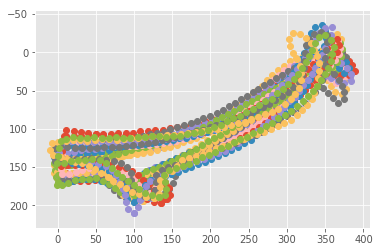

In [6]:
plt.style.use('ggplot')

my_shapes = list()
for index, row in df.iterrows():
    my_shapes.append(Shape(row[1:].values.reshape((100, 2)), row[0]))

for shape in my_shapes:
    shape.align_shape(my_shapes[0])    
for shape in my_shapes[:20]:
    shape.plot_shape()

plt.axes().set_aspect('equal', 'datalim')
plt.gca().invert_yaxis()
plt.show()

In [7]:
df_procrustes = pd.DataFrame(columns=range(200))
for index, shape in enumerate(my_shapes):
    df_procrustes.loc[index] = my_shapes[index].xy.reshape((200,))
df_procrustes.to_csv('data/procrustes_coordinates_homemade.txt', index=None)

In [8]:
from sklearn.decomposition import PCA # using randomized Singular Value Decomposition

id_ =  merged['id']
class_ = merged['class']
merged = merged.drop(['id', 'class'], axis=1)
Xp = PCA(svd_solver='randomized', n_components=2, random_state=1).fit_transform(merged.values)
Xp

array([[ 2911.32404422,  -289.21692901],
       [17661.05552221, -1974.24360288],
       [12630.01626593,  -254.81502767],
       ...,
       [-1644.0789964 ,  1816.51272327],
       [-2267.16049681,   531.30093407],
       [-2259.27535983,   693.47303218]])

<Figure size 432x288 with 0 Axes>

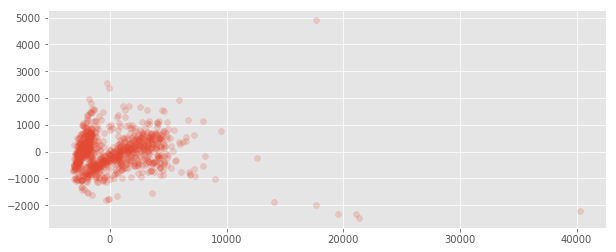

In [9]:
# get the product class 
plt.clf()
colors = plt.get_cmap("hsv")

plt.figure(figsize=(10, 4))
plt.scatter(Xp[:, 0], Xp[:, 1], alpha=0.2)
plt.show()

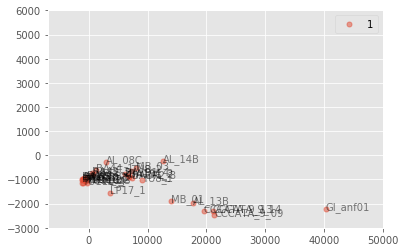

In [10]:
# %matplotlib notebook
pca_df = pd.DataFrame(Xp, columns=['x', 'y'])
pca_df = pd.concat([id_, class_, pca_df], axis=1)
pca_df

groups = pca_df.groupby('class')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    if name in (1,): # 11, 10 y 9
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
        #print(group)
        for i, row in group.iterrows():
            #print(row.id)
            ax.annotate(row.id, (row.x, row.y), alpha=0.5)

ax.set_xlim([-7000, 50000])
ax.set_ylim([-3000, 6000])
ax.legend()
plt.show()

number of estimated clusters : 9


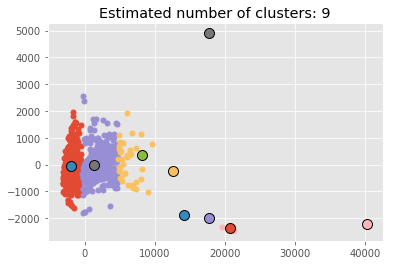

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

bandwidth = estimate_bandwidth(Xp, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(Xp)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

plt.figure(1)
plt.clf()

for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(Xp[my_members, 0], Xp[my_members, 1], 'o', markersize=5)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markeredgecolor='k', markersize=10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


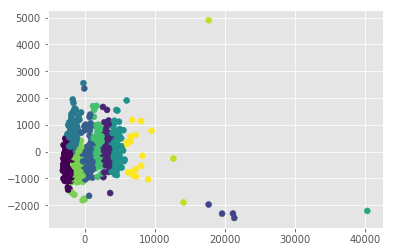

In [12]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=11, random_state=42).fit_predict(Xp)
plt.scatter(Xp[:, 0], Xp[:, 1], c=y_pred)
plt.show()